In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the database
df = pd.read_csv("train.csv")

print("File loaded successfully!")
# Look at the frist 5 rows
print(df.head())
# Check for missing values (A key Data Science step!)
print(df.isnull().sum())


File loaded successfully!
   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                   

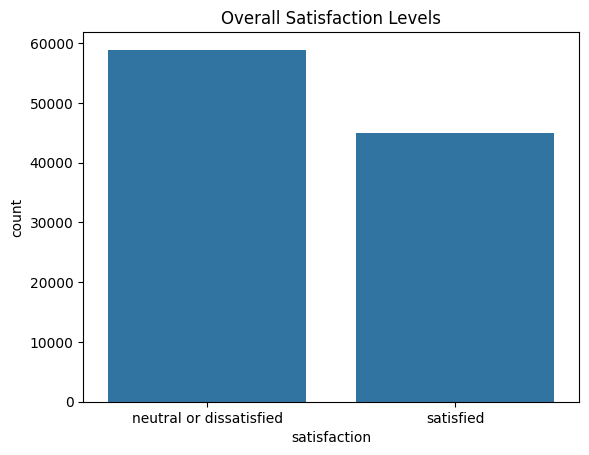

In [7]:
sns.countplot(x = 'satisfaction', data = df)
plt.title('Overall Satisfaction Levels')
plt.show()

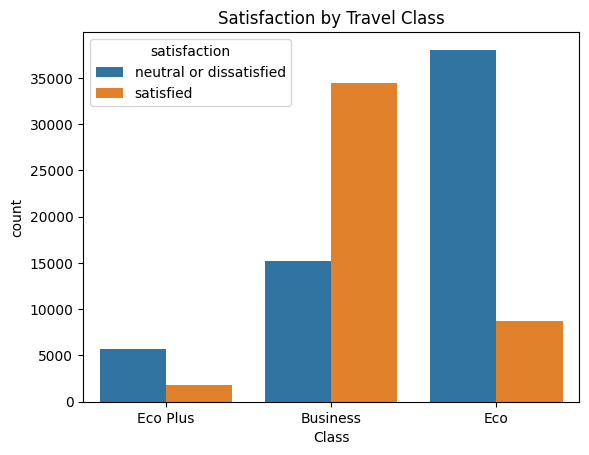

In [8]:
sns.countplot( x = 'Class', hue = 'satisfaction', data = df)
plt.title('Satisfaction by Travel Class')
plt.show()

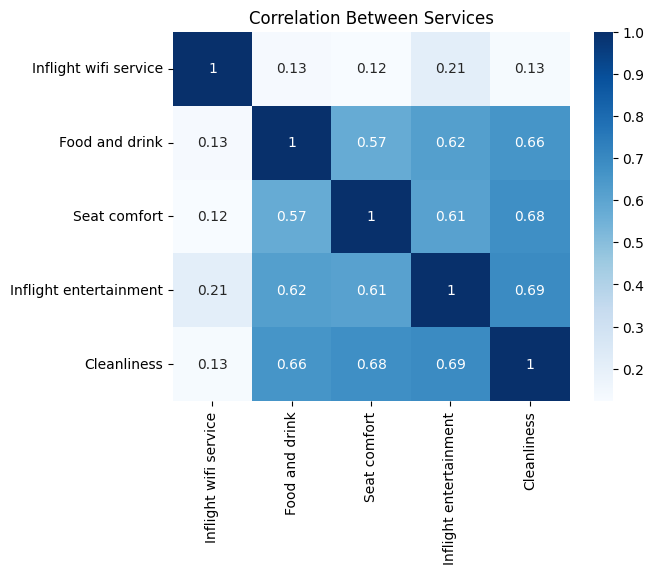

In [10]:
# We will look at the heatmap of the survey scores
survey_cols = ['Inflight wifi service', 'Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness' ]
sns.heatmap(df[survey_cols].corr(), annot = True, cmap = 'Blues')
plt.title('Correlation Between Services')
plt.show()

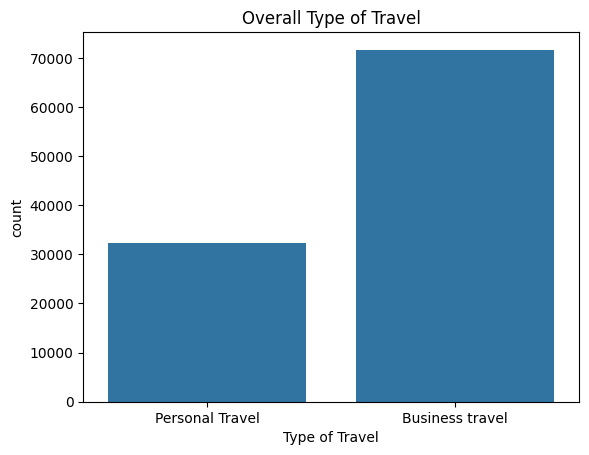

In [11]:
sns.countplot(x = 'Type of Travel', data = df)
plt.title('Overall Type of Travel')
plt.show()

In [12]:
# Group by 'Type of Travel' and calculate the mean of 'Departure Delay in Minutes'
delay_analysis = df.groupby('Type of Travel')['Departure Delay in Minutes'].mean()

print('Average Departure Delay by Traval Type:')
print(delay_analysis)

Average Departure Delay by Traval Type:
Type of Travel
Business travel    14.954937
Personal Travel    14.506062
Name: Departure Delay in Minutes, dtype: float64


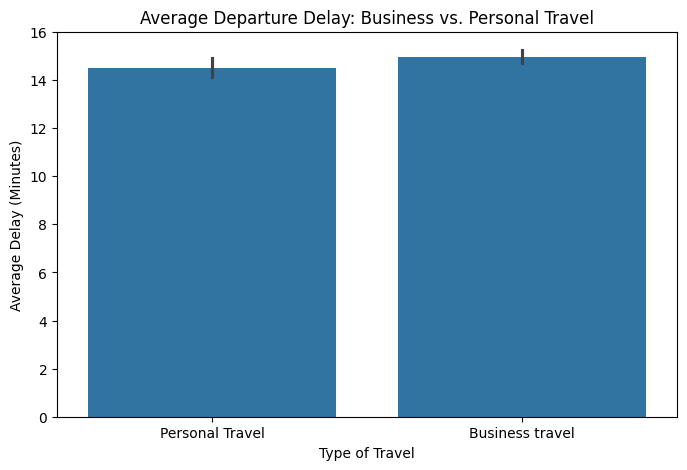

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Type of Travel', y='Departure Delay in Minutes', data=df)
plt.title('Average Departure Delay: Business vs. Personal Travel')
plt.ylabel('Average Delay (Minutes)')
plt.show()

In [14]:
# This shows: Average delay for (Business + Satisfied) vs (Business + Neutral/Dissatisfied), etc.
pivot_result = df.pivot_table(index='Type of Travel',
                             columns='satisfaction',
                             values='Departure Delay in Minutes',
                             aggfunc='mean')

print(pivot_result)

satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                17.646595  13.026494
Personal Travel                15.323818   7.281183


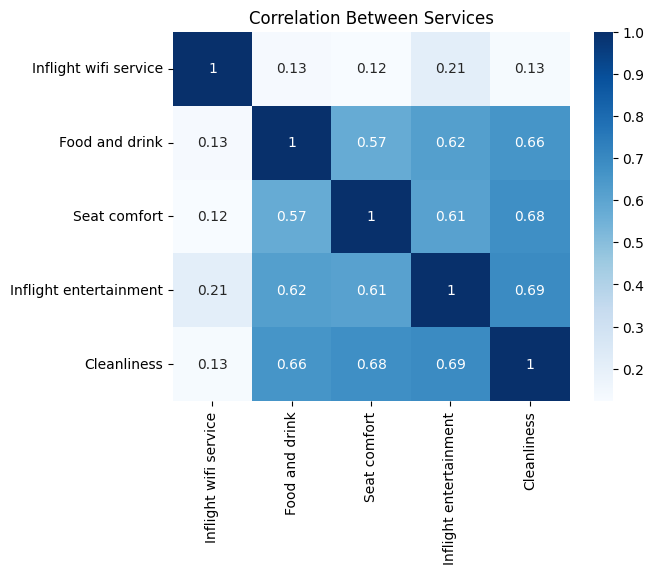

In [ ]:
# We will look at the heatmap of the survey scores
survey_cols = ['Inflight wifi service', 'Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness' ]
sns.heatmap(df[survey_cols].corr(), annot = True, cmap = 'Blues')
plt.title('Correlation Between Services')
plt.show()

In [15]:
# 1. Convert satisfaction to 0 and 1
# 1 = Satisfied, 0 = Neutral/Dissatisfied
df['satisfaction_numeric'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# 2. Check the correlation between Delay and Satisfaction
correlation = df['Departure Delay in Minutes'].corr(df['satisfaction_numeric'])

print(f"The correlation between Departure Delay and Satisfaction is: {correlation:.4f}")

The correlation between Departure Delay and Satisfaction is: -0.0505


In [16]:
# Compare the correlation of different features to satisfaction
features = ['Departure Delay in Minutes', 'Inflight wifi service', 'Online boarding', 'Seat comfort']
correlations = df[features + ['satisfaction_numeric']].corr()['satisfaction_numeric'].sort_values(ascending=False)

print("Correlation of features with Satisfaction:")
print(correlations)

Correlation of features with Satisfaction:
satisfaction_numeric          1.000000
Online boarding               0.503557
Seat comfort                  0.349459
Inflight wifi service         0.284245
Departure Delay in Minutes   -0.050494
Name: satisfaction_numeric, dtype: float64


The Top 3 Drivers of Satisfaction are:
Online boarding           0.503557
Inflight entertainment    0.398059
Seat comfort              0.349459
Name: satisfaction_numeric, dtype: float64


/tmp/ipython-input-1235231551.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='satisfaction', y=feature, data=df, ax=axes[i], palette='viridis')
/tmp/ipython-input-1235231551.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='satisfaction', y=feature, data=df, ax=axes[i], palette='viridis')
/tmp/ipython-input-1235231551.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='satisfaction', y=feature, data=df, ax=axes[i], palette='viridis')


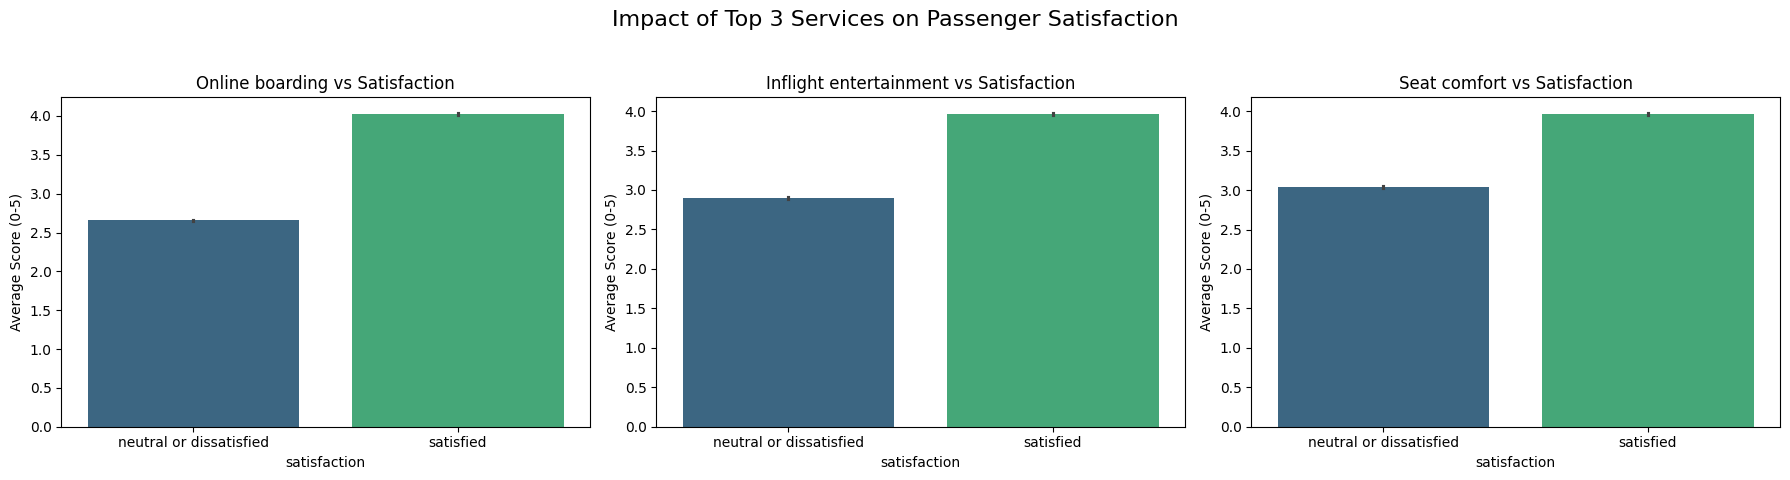

In [17]:
# 1. Get a list of all numeric columns that are survey scores (usually 0-5)
# We exclude ID, Age, and the Delays for this specific comparison
survey_features = [
    'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
    'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness'
]

# 2. Calculate correlation and find the top 3
top_3_features = df[survey_features + ['satisfaction_numeric']].corr()['satisfaction_numeric'].sort_values(ascending=False)[1:4]
print("The Top 3 Drivers of Satisfaction are:")
print(top_3_features)

# 3. Visualize these Top 3 using Bar Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Impact of Top 3 Services on Passenger Satisfaction', fontsize=16)

for i, feature in enumerate(top_3_features.index):
    sns.barplot(x='satisfaction', y=feature, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'{feature} vs Satisfaction')
    axes[i].set_ylabel('Average Score (0-5)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The Problem: We wanted to find what drives airline satisfaction.

The Key Finding: "While Business travelers face more delays, Online Boarding and Inflight Wifi are actually 5x more important for their satisfaction than the delay itself."

The Recommendation: "Prioritize digital infrastructure over flight speed to improve customer retention."